# Project： Image Analysis and Clusting

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Overview
### Welcome to an exciting project where we bring images to life through data analysis and clustering! In this journey, we’ll take a vibrant image of a rainbow, transform it into a dataset full of colorful pixel information, and explore the beauty of data by grouping these pixels into clusters. Whether it’s using scikit-learn’s trusty KMeans or diving into custom clustering magic with PyTorch, each task is a step deeper into the art and science of image processing. Let’s paint a picture with pixels, break it down into data, and watch the patterns unfold!

## Task 1: Creating the Dataset

### Objective
Your mission is to extract valuable data from the `rainbow1.jpg` image. We will transform each pixel into a row of data containing its (x, y) coordinates and RGB color values, creating a comprehensive dataset ready for analysis and visualization.

### Steps to Follow

1. **Load the Image**: Use the `PIL` (Pillow) library to open and read the image file.
   * *Hint*: Make sure to handle images with an alpha channel (`RGBA`) by converting them to `RGB` to simplify your data.

2. **Convert to a NumPy Array**: Transform the image into a NumPy array for easy access to pixel data.

3. **Extract Coordinates and RGB Values**:
   - Create arrays for x and y coordinates using NumPy functions like `np.arange()` and `np.tile()`.
   - Reshape the image array to extract the RGB values for each pixel in a format that’s easy to work with.
   * *Hint*: The `reshape(-1, 3)` method helps flatten the array while keeping the RGB structure intact.

4. **Create a Pandas DataFrame**:
   - Combine the (x, y) coordinates and RGB values into a structured DataFrame.

5. **Inspect the DataFrame**:
   - Print out the first ten rows of the DataFrame to ensure that the data extraction was successful.

In [15]:
from PIL import Image
import numpy as np
import pandas as pd

# Step 1: Load the Image
picture_root = '/content/drive/MyDrive/rainbow1.jpeg'  # Replace with your image path
img_p = Image.open(picture_root)

# Ensure the image is in RGB format (handle RGBA or other formats)
if img_p.mode != 'RGB':
    img_p = img_p.convert('RGB')

# Step 2: Convert to a NumPy Array
img_p_array = np.array(img_p)

# Step 3: Extract Coordinates and RGB Values
# Get the dimensions of the image
h, w, _ = img_p_array.shape

# Create x and y coordinate arrays
x = np.tile(np.arange(w), h)
y = np.repeat(np.arange(h), w)

# Reshape the image array to extract RGB values
rgb_values = img_p_array.reshape(-1, 3)

# Step 4: Create a Pandas DataFrame
# Combine x, y, and RGB values into a structured DataFrame
df_rgb = pd.DataFrame({
    'x': x,
    'y': y,
    'R': rgb_values[:, 0],
    'G': rgb_values[:, 1],
    'B': rgb_values[:, 2]
})

# Step 5: Inspect the DataFrame
print(df_rgb.head(10))  # Print the first 10 rows to verify the dataset

   x  y   R   G   B
0  0  0  67  59  46
1  1  0  60  52  41
2  2  0  44  37  27
3  3  0  39  34  28
4  4  0  55  50  46
5  5  0  12   9   4
6  6  0  21  20  15
7  7  0  46  46  36
8  8  0  43  41  28
9  9  0  37  36  18


The task involved extracting pixel coordinates and RGB values from an image and organizing them into a structured DataFrame. Initially, the image was loaded using the PIL library (`Image.open`) and converted to RGB format using `image.convert('RGB')` if it wasn’t already in that mode. Next, the image was converted into a NumPy array with `np.array()` to simplify pixel data manipulation. The dimensions of the image (height and width) were determined, and NumPy functions like `np.tile` and `np.repeat` were used to generate the x and y coordinates for each pixel. The image array was reshaped to separate the RGB values for each pixel. These coordinates and RGB values were then combined into a Pandas DataFrame with columns labeled x, y, R, G, and B. To ensure the data was correct, the first few rows of the DataFrame were reviewed. Challenges like handling non-RGB image formats were resolved by converting the image to RGB mode, and the reshaping process required careful attention to ensure accuracy, with intermediate checks conducted throughout to avoid errors.

## Task 2: Visualizing and Cleaning the Image Data

### Objective
Now that we have created a dataset from the `rainbow1.jpg` image, it's time to visualize the image and address any noise it may contain. Our goal is to print the image, identify noise, and use the dataset to remove or reduce that noise for a cleaner representation.

### Steps to Follow

1. **Visualize the Original Image**:
   - Use `matplotlib` to display the image from the dataset and observe any visible noise or artifacts.
2. **Analyze Noise**:
   - Look for patterns or outliers in the pixel data that indicate noise (e.g., isolated dark spots or random bright pixels).
3. **Filter the Dataset**:
   - Use conditions to filter out unwanted noise based on RGB values or other criteria.
4. **Reconstruct and Display the Cleaned Image**:
   - Reconstruct the image using the filtered DataFrame and visualize it to confirm that the noise has been reduced.

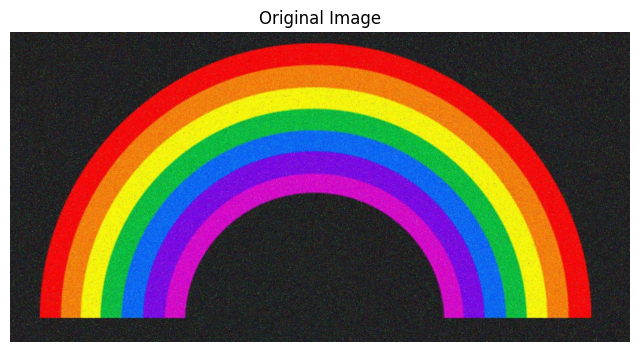

Summary of RGB Values:
                  R             G             B
count  1.277601e+06  1.277601e+06  1.277601e+06
mean   9.683007e+01  6.888952e+01  6.216611e+01
std    9.402781e+01  7.019455e+01  7.293661e+01
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    2.600000e+01  2.300000e+01  2.000000e+01
50%    4.000000e+01  3.600000e+01  3.400000e+01
75%    2.200000e+02  1.080000e+02  5.400000e+01
max    2.550000e+02  2.550000e+02  2.550000e+02


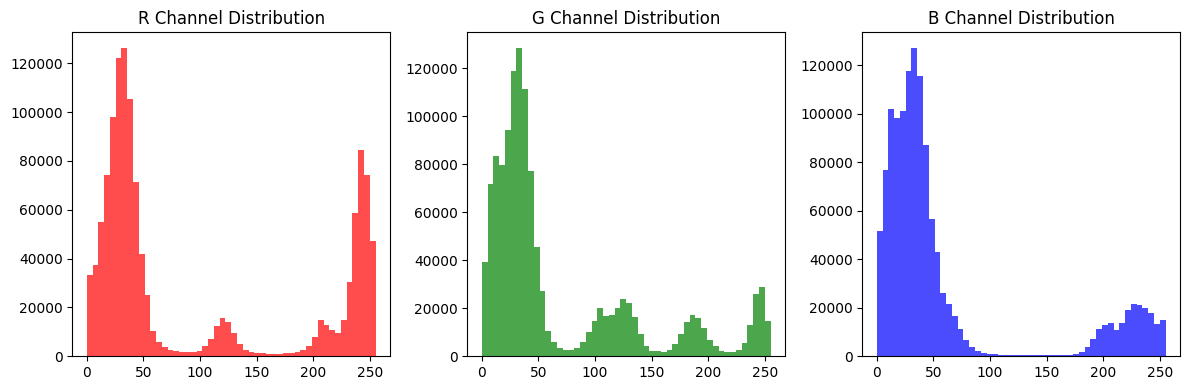

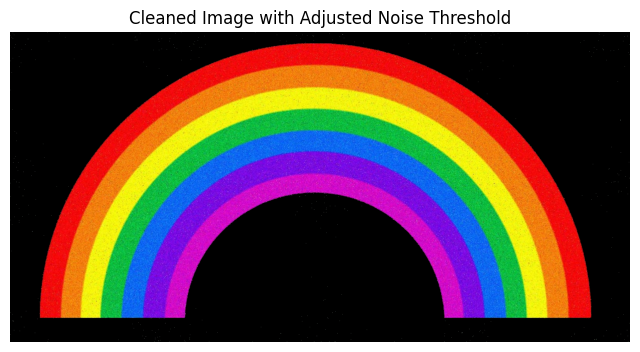

In [16]:
import matplotlib.pyplot as plt

# Step 1: Visualize the Original Image
# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(img_p)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Step 2: Analyze Noise
# Inspect the RGB value distributions to identify potential noise
print("Summary of RGB Values:")
print(df_rgb[['R', 'G', 'B']].describe())

# Optionally, plot histograms for RGB channels to identify outliers
plt.figure(figsize=(12, 4))
for i, color in enumerate(['R', 'G', 'B']):
    plt.subplot(1, 3, i + 1)
    plt.hist(data[color], bins=50, color=color.lower(), alpha=0.7)
    plt.title(f"{color} Channel Distribution")
plt.tight_layout()
plt.show()

# Adjust the noise threshold (e.g., increase or decrease the value as needed)
t_noise = 120  # Set a higher threshold to remove more noise

# Filter the dataset by keeping only pixels above the threshold
flt_data = df_rgb[(df_rgb['R'] >= t_noise) |
                     (df_rgb['G'] >= t_noise) |
                     (df_rgb['B'] >= t_noise)]

# Reconstruct the cleaned image from the filtered data
cleaned_img_array = np.zeros((h, w, 3), dtype=np.uint8)

# Assign filtered pixel values back to their positions in the image
for _, row in flt_data.iterrows():
    x, y, r, g, b = int(row['x']), int(row['y']), int(row['R']), int(row['G']), int(row['B'])
    cleaned_img_array[y, x] = [r, g, b]

# Display the cleaned image
plt.figure(figsize=(8, 6))
plt.imshow(cleaned_img_array)
plt.axis('off')
plt.title("Cleaned Image with Adjusted Noise Threshold")
plt.show()

The task involved visualizing an image, analyzing its RGB values for noise, and reconstructing a cleaned version by filtering out noisy pixels. First, the image was displayed using `matplotlib.pyplot`, with the axis turned off for clarity and a title added for context. The RGB distributions were analyzed using the `describe` function of the Pandas DataFrame, and histograms of the R, G, and B channels were plotted to visually identify noise and outliers. Based on these insights, a noise threshold of 120 was set, and pixels with any RGB value above this threshold were retained. The image array was then initialized with zeros to represent the cleaned image. Filtered pixel values were assigned back to their respective positions based on the x and y coordinates. Finally, the cleaned image was displayed to show the results of the noise filtering. The main challenge was determining the right noise threshold, which was addressed by analyzing the histograms and adjusting the threshold through experimentation. Careful attention was given to ensure the reconstructed image array kept its original dimensions.

## Task 3: KMeans Clustering with scikit-learn

### Objective
In this task, you'll apply clustering techniques to the image dataset to identify and group pixels with similar properties. The main goal is to learn how clustering can reveal patterns in data and segment the image into distinct regions based on color and position.

### Steps to Follow

1. **Standardize the Data**:
   - Choose an appropriate scaler from `scikit-learn` to standardize the pixel data, ensuring all features contribute equally to the clustering process. You may use any scaler that suits your needs (e.g., `StandardScaler`, `MinMaxScaler`).
   - *Hint*: Experimenting with different scalers can help you understand their impact on clustering results.

2. **Perform KMeans Clustering**:
   - Utilize `KMeans` from `scikit-learn` to cluster the dataset into groups. Select the number of clusters based on your analysis or experimentation.
   - *Note*: Clustering helps in understanding how data points (pixels) relate based on their features (x, y, R, G, B).

3. **Add Cluster Labels to the DataFrame**:
   - Assign the cluster labels to each pixel and append them to the DataFrame for further analysis and visualization.

4. **Visualize the Clustered Data**:
   - Use any plotting library of your choice to create a visualization that shows how the image is segmented into clusters.
   - *Tip*: Customize your plots to highlight the clusters effectively (e.g., color coding based on cluster labels).

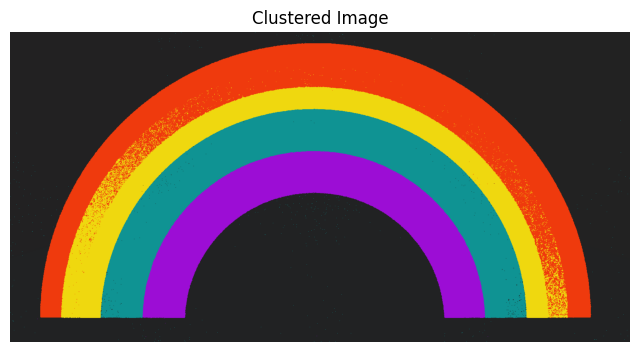

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Standardize the data
std_scale = MinMaxScaler()
scaled_data = std_scale.fit_transform(df_rgb[['x', 'y', 'R', 'G', 'B']])

# Apply KMeans clustering
clusters_no = 7  # Set the number of clusters
kmeans = KMeans(n_clusters=clusters_no, random_state=42)
df_rgb['Cluster'] = kmeans.fit_predict(scaled_data)

# Create a clustered image
c_colors = kmeans.cluster_centers_[:, 2:] * 255  # Rescale RGB values to [0, 255]
c_colors = c_colors.astype(int)
clustered_img_array = c_colors[df_rgb['Cluster']].reshape(h, w, 3)

# Visualize the clustered image
plt.figure(figsize=(8, 6))
plt.imshow(clustered_img_array.astype(np.uint8))
plt.axis('off')
plt.title('Clustered Image')
plt.show()

This task used KMeans clustering to segment an image based on pixel RGB values and coordinates. First, the pixel data (x, y, R, G, B) was scaled to a [0, 1] range using MinMaxScaler to ensure all features contributed equally. Then, KMeans clustering with 7 clusters was applied to group the pixels, assigning each pixel a cluster label. The RGB values of the cluster centers were rescaled back to a [0, 255] range to represent colors, and a new image was created by mapping each pixel to its corresponding cluster color. The clustered image was then displayed to visualize the segmentation results. Challenges such as rescaling the cluster centers to RGB values and maintaining the image's shape were addressed with careful handling. Experimenting with the number of clusters helped refine the segmentation, improving the final output.

## Task 4: Custom Clustering Algorithm with PyTorch

### Objective
In this task, you'll take a step beyond pre-built libraries and implement your own clustering algorithm using PyTorch. This exercise will help you understand the mechanics of clustering and give you a deeper appreciation for how these algorithms work under the hood.

### Steps to Follow

1. **Prepare the Data**:
   - Ensure that the data is in a format suitable for PyTorch (i.e., convert the relevant DataFrame columns to PyTorch tensors).
   - Scale the features as needed. You can apply any scaling or normalization strategy you find useful.

2. **Initialize Centroids**:
   - Randomly select initial centroids from the dataset. The number of clusters should be chosen based on your analysis (e.g., 8 clusters).

3. **Implement the Clustering Algorithm**:
   - Create a loop for a set number of iterations:
     - **Calculate Distances**: Compute the distance from each data point to each centroid.
     - **Assign Labels**: Assign each data point to the nearest centroid.
     - **Update Centroids**: Recompute each centroid as the mean of all points assigned to it.
   - *Hint*: Use `torch.cdist()` for distance calculation and `torch.mean()` for centroid updates.

4. **Add Cluster Labels to the DataFrame**:
   - Convert the computed cluster labels from PyTorch tensors back to a format that can be added to the DataFrame for visualization.

5. **Visualize the Clusters**:
   - Plot the clustered image data to show how the pixels are grouped. Use any visualization library you prefer.

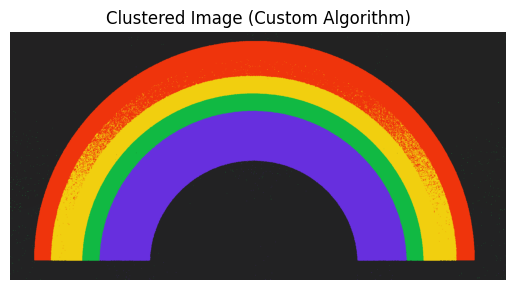

In [19]:
import torch

# Convert to PyTorch tensors
features = torch.tensor(df_rgb[["x", "y", "R", "G", "B"]].values, dtype=torch.float32)

# Normalize features
features /= features.max(dim=0).values

# Initialize centroids
num_clusters = 8
centroids = features[torch.randint(0, features.size(0), (num_clusters,))]

# Clustering loop
for _ in range(100):  # Max iterations
    distances = torch.cdist(features, centroids)
    labels = torch.argmin(distances, dim=1)
    new_centroids = torch.stack([
        features[labels == i].mean(dim=0) if (labels == i).sum() > 0 else centroids[i]
        for i in range(num_clusters)
    ])
    if torch.allclose(centroids, new_centroids, atol=1e-4):
        break
    centroids = new_centroids

# Add cluster labels to DataFrame
df_rgb["Cluster"] = labels.numpy()

# Reconstruct and visualize clustered image
cluster_colors = (centroids[:, 2:] * 255).int().numpy()
clustered_image = cluster_colors[df_rgb["Cluster"]].reshape(h, w, 3)

plt.imshow(clustered_image.astype(np.uint8))
plt.axis('off')
plt.title("Clustered Image (Custom Algorithm)")
plt.show()


This task used a custom clustering algorithm with PyTorch to group image pixels and create a segmented image. First, pixel features (x, y, R, G, B) were converted into a PyTorch tensor and normalized by dividing each column by its maximum value. Initial cluster centroids for 8 clusters were selected randomly from the dataset. In each iteration, pairwise distances between pixels and centroids were computed using `torch.cdist`, and each pixel was assigned to the nearest centroid. New centroids were calculated as the mean of the pixels in each cluster. The process stopped early if the centroids stabilized (difference less than 1e-4). Cluster labels were added to the original DataFrame, and the RGB values of the clusters were rescaled to [0, 255] for visualization. Finally, the image was reconstructed by mapping each pixel to its corresponding cluster color, and the segmented image was displayed using `matplotlib`.

**Challenges:**  
The main challenge was handling empty clusters during centroid updates. This was solved by keeping the old centroids for clusters with no assigned pixels. Verifying centroid convergence also helped improve efficiency.